In [29]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from tensorflow.keras.models import Sequential

In [30]:
os.chdir ('C:\\Users\\infip\\OneDrive\\Documents\\PY Projects\\PRJ Stock Price Prediction\\')

In [31]:
df =pd.read_csv("prices.csv", header=0)
display (df)

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [32]:
print(df.shape)

(851264, 7)


In [33]:
print(df.columns)

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')


In [34]:
df.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [35]:
display(df.symbol.unique().shape)

(501,)

In [36]:
df.symbol.unique()[0:10]

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI'], dtype=object)

In [37]:
print(len(df.symbol.values))

851264


In [38]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [39]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [40]:
df.date.unique()

array(['2016-01-05 00:00:00', '2016-01-06 00:00:00',
       '2016-01-07 00:00:00', ..., '2016-12-28', '2016-12-29',
       '2016-12-30'], dtype=object)

In [41]:
pd.DataFrame(df.date.unique())

,0
0,2016-01-05 00:00:00
1,2016-01-06 00:00:00
2,2016-01-07 00:00:00
3,2016-01-08 00:00:00
4,2016-01-11 00:00:00
...,...
3519,2016-12-23
3520,2016-12-27
3521,2016-12-28
3522,2016-12-29


In [42]:
df.duplicated().sum()

0

In [43]:
#Calling the file in nyse named securities.csv, It has the company details 
comp_info = pd.read_csv('securities.csv')
comp_info

,Ticker_symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31-03-1964,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31-12-2012,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",31-08-2015,718877
...,...,...,...,...,...,...,...,...
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",NaN,1011006
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",06-10-1997,1041061
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",NaN,1136869
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",NaN,109380


In [44]:
comp_info["Ticker_symbol"].unique()

array(['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AAP', 'AES',
       'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ALXN',
       'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN',
       'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC',
       'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANTM', 'AON', 'APA', 'AIV',
       'AAPL', 'AMAT', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP',
       'AN', 'AZO', 'AVB', 'AVY', 'BHI', 'BLL', 'BAC', 'BCR', 'BAX',
       'BBT', 'BDX', 'BBBY', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA',
       'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG',
       'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG',
       'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX',
       'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C',
       'CFG', 'CTXS', 'CME', 'CMS', 'COH', 'KO', 'CTSH', 'CL', 'CMCSA',
       'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'GLW', 'COST', 'COTY',


In [45]:
con_names = comp_info["Security"].unique()
for x in con_names:
    print(x)

3M Company
Abbott Laboratories
AbbVie
Accenture plc
Activision Blizzard
Acuity Brands Inc
Adobe Systems Inc
Advance Auto Parts
AES Corp
Aetna Inc
Affiliated Managers Group Inc
AFLAC Inc
Agilent Technologies Inc
Air Products & Chemicals Inc
Akamai Technologies Inc
Alaska Air Group Inc
Albemarle Corp
Alexion Pharmaceuticals
Allegion
Allergan, Plc
Alliance Data Systems
Alliant Energy Corp
Allstate Corp
Alphabet Inc Class A
Alphabet Inc Class C
Altria Group Inc
Amazon.com Inc
Ameren Corp
American Airlines Group
American Electric Power
American Express Co
American International Group, Inc.
American Tower Corp A
American Water Works Company Inc
Ameriprise Financial
AmerisourceBergen Corp
AMETEK Inc
Amgen Inc
Amphenol Corp
Anadarko Petroleum Corp
Analog Devices, Inc.
Anthem Inc.
Aon plc
Apache Corporation
Apartment Investment & Mgmt
Apple Inc.
Applied Materials Inc
Archer-Daniels-Midland Co
Arconic Inc
Arthur J. Gallagher & Co.
Assurant Inc
AT&T Inc
Autodesk Inc
Automatic Data Processing
Auto

In [46]:
comp_info["Ticker_symbol"].nunique()

505

In [47]:
comp_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker_symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


In [48]:
comp_info.isnull().sum()

Ticker_symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64

In [49]:
comp_info.describe()

,CIK
count,5.050000e+02
mean,7.074490e+05
std,5.144375e+05
min,1.800000e+03
25%,8.631200e+04
50%,8.310010e+05
75%,1.075531e+06
max,1.659166e+06


In [50]:
comp_info.describe()

,CIK
count,5.050000e+02
mean,7.074490e+05
std,5.144375e+05
min,1.800000e+03
25%,8.631200e+04
50%,8.310010e+05
75%,1.075531e+06
max,1.659166e+06


In [51]:
comp_info.loc[comp_info.Security.str.startswith('Face') , :]

,Ticker_symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
181,FB,Facebook,reports,Information Technology,Internet Software & Services,"Menlo Park, California",23-12-2013,1326801


In [52]:
comp_info.loc[comp_info.Security.str.startswith('Acc') , :]

,Ticker_symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373


In [53]:
comp_info.loc[comp_info.Security.str.startswith('Ni') , :]

,Ticker_symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
329,NLSN,Nielsen Holdings,reports,Industrials,Research & Consulting Services,"New York, New York",09-07-2013,1492633
330,NKE,Nike,reports,Consumer Discretionary,"Apparel, Accessories & Luxury Goods","Washington County, Oregon",30-11-1988,320187
331,NI,NiSource Inc.,reports,Utilities,MultiUtilities,"Merrillville, Indiana",NaN,1111711


In [54]:
comp_plot = comp_info.loc[(comp_info["Security"] == 'Yahoo Inc.') | 
                          (comp_info["Security"] == 'Xerox Corp.') | 
                          (comp_info["Security"] == 'Adobe Systems Inc')|
                          (comp_info["Security"] == 'Microsoft Corp.') | 
                          (comp_info["Security"] == 'Facebook') | 
                          (comp_info["Security"] == 'Goldman Sachs Group')|
                          (comp_info["Security"] == 'Amazon.com Inc')|
                          (comp_info["Security"] == 'Apple Inc.')|
                          (comp_info["Security"] == 'Cisco Systems')|
                          (comp_info["Security"] == 'Nike'), ["Ticker_symbol"] ]["Ticker_symbol"] 
print(comp_plot)

6      ADBE
26     AMZN
45     AAPL
106    CSCO
181      FB
212      GS
306    MSFT
330     NKE
496     XRX
500    YHOO
Name: Ticker_symbol, dtype: object


In [55]:
for i in comp_plot:
    print (i)

ADBE
AMZN
AAPL
CSCO
FB
GS
MSFT
NKE
XRX
YHOO


In [56]:
def plotter(code):
    # Function used to create graphs for 6 companies 
    global closing_stock ,opening_stock
    #creating plot of all 6 company for opening and closing stock  total 12 graphs
    # Below statement create 2X2 empty chart 
    f, axs = plt.subplots(2,2,figsize=(15,8))
    # total 12 graphs
    # creating plot opening prize of particular company
    plt.subplot(212)
    #taking name of the company as code, get all records related to one company
    company = df[df['symbol']==code]
    #taking the values of one company and taking its open column values to 1D array
    company = company.open.values.astype('float32')
    #reshaping the open stock value from 1D  to 2D .
    company = company.reshape(-1, 1)
    # putting the value of company in opening_stock 
    opening_stock = company
    # plotting the data with green graph between "Time" and "prices vs time"
    
    plt.grid(True)# enalbling the grid in graph
    plt.xlabel('Time') # setting X axis as time
    # setting Y axis as company name + open stock prices
    plt.ylabel(code + " open stock prices") 
    plt.title('prices Vs Time') # setting title
    plt.plot(company , 'g') # calling the graph with green graph line
    
    # creating plot closing prize of particular company
    plt.subplot(211)
    #taking name of the company as code
    company_close = df[df['symbol']==code]
    #taking the values of one company and taking its close column values
    company_close = company_close.close.values.astype('float32')
    #reshaping the open column value in 1D and calling it closing_stock
   # -1 for unknown dimension
    company_close = company_close.reshape(-1, 1)
    # putting company_close value in closing_stock 
    closing_stock = company_close
    # plotting the data graph between "Time" and "prices vs time"
    plt.xlabel('Time') # setting x axis as time
    plt.ylabel(code + " close stock prices")# setting y axis as company name + open stock prices
    plt.title('prices Vs Time') # setting title as price vs time
    plt.grid(True) # enabling the grid in graph
    plt.plot(company_close , 'b') #creating the data graph in blue graph line
    plt.show() # calling the graph


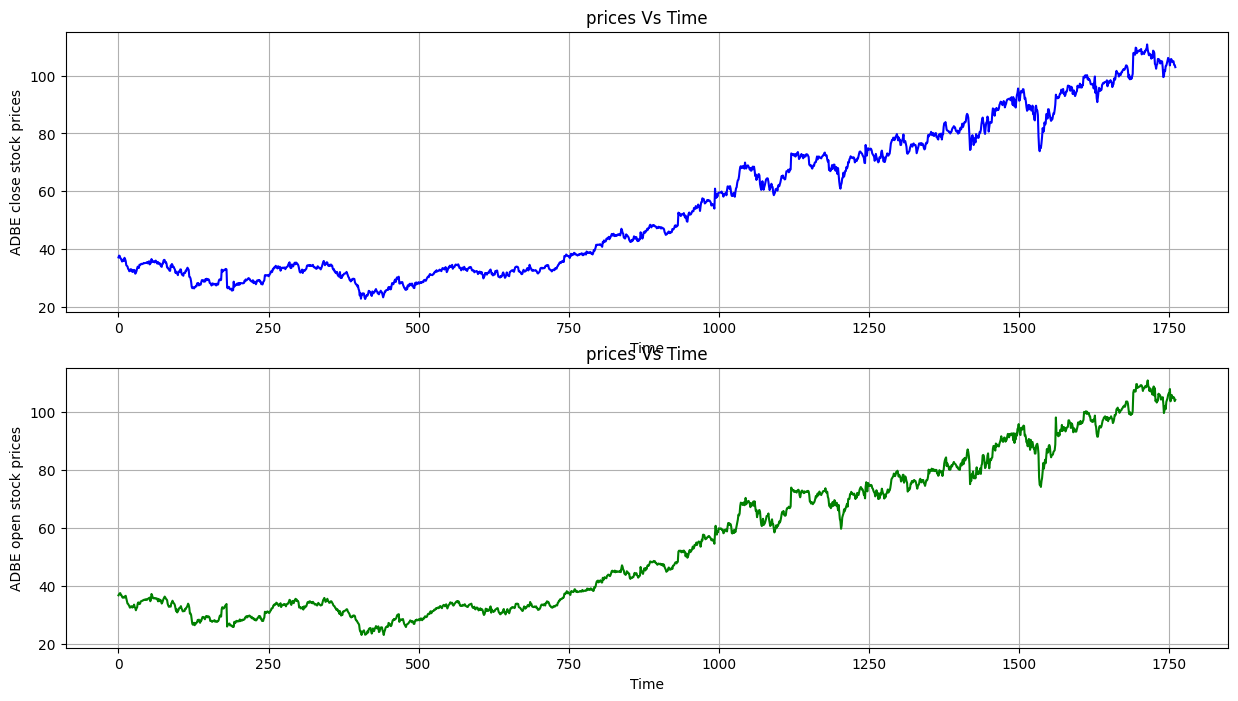

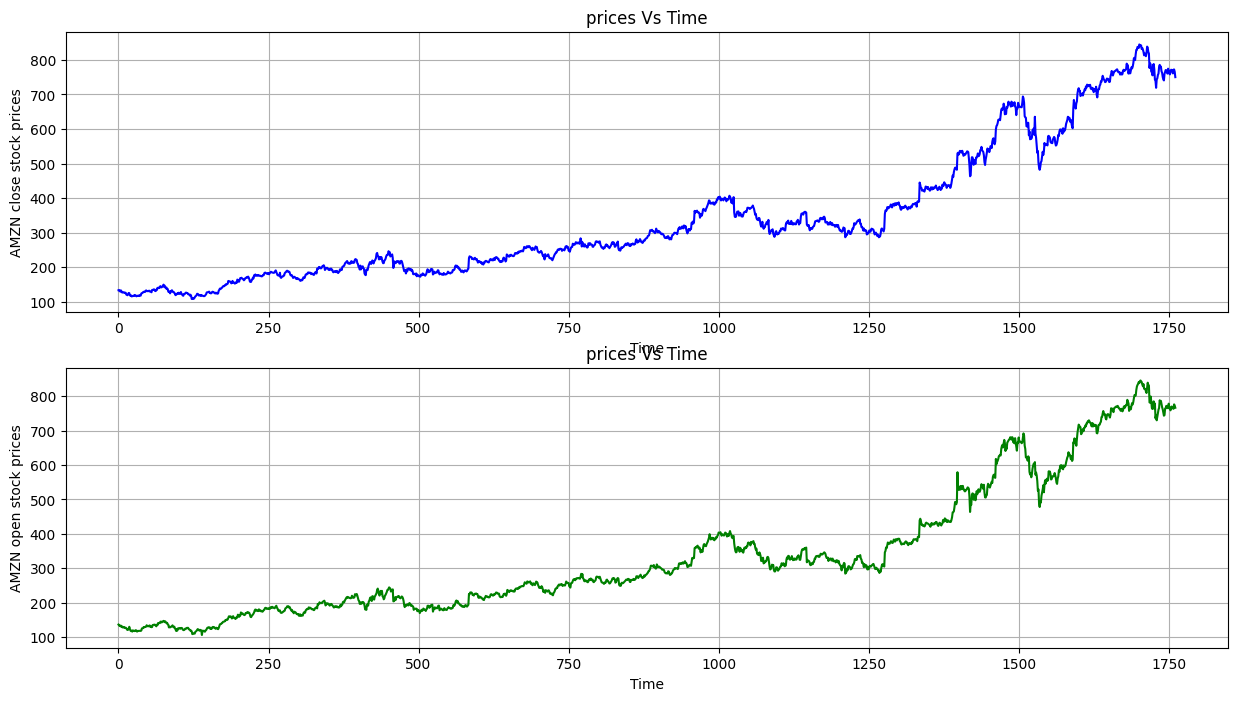

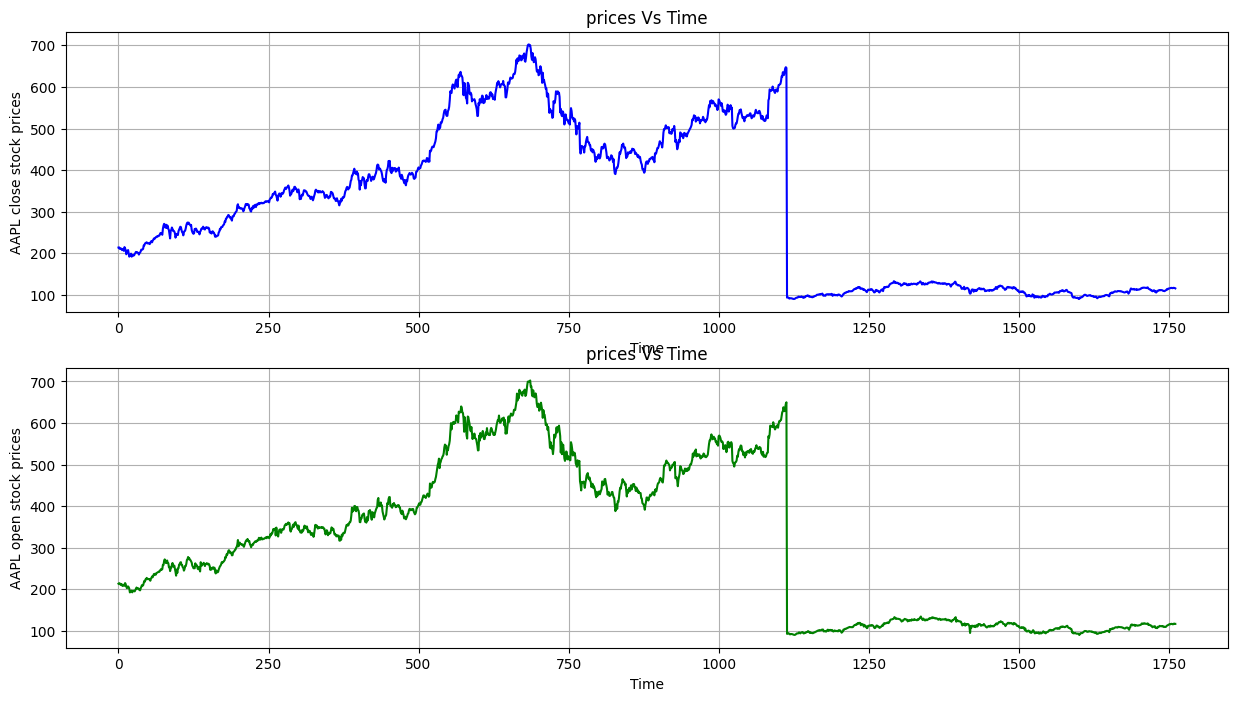

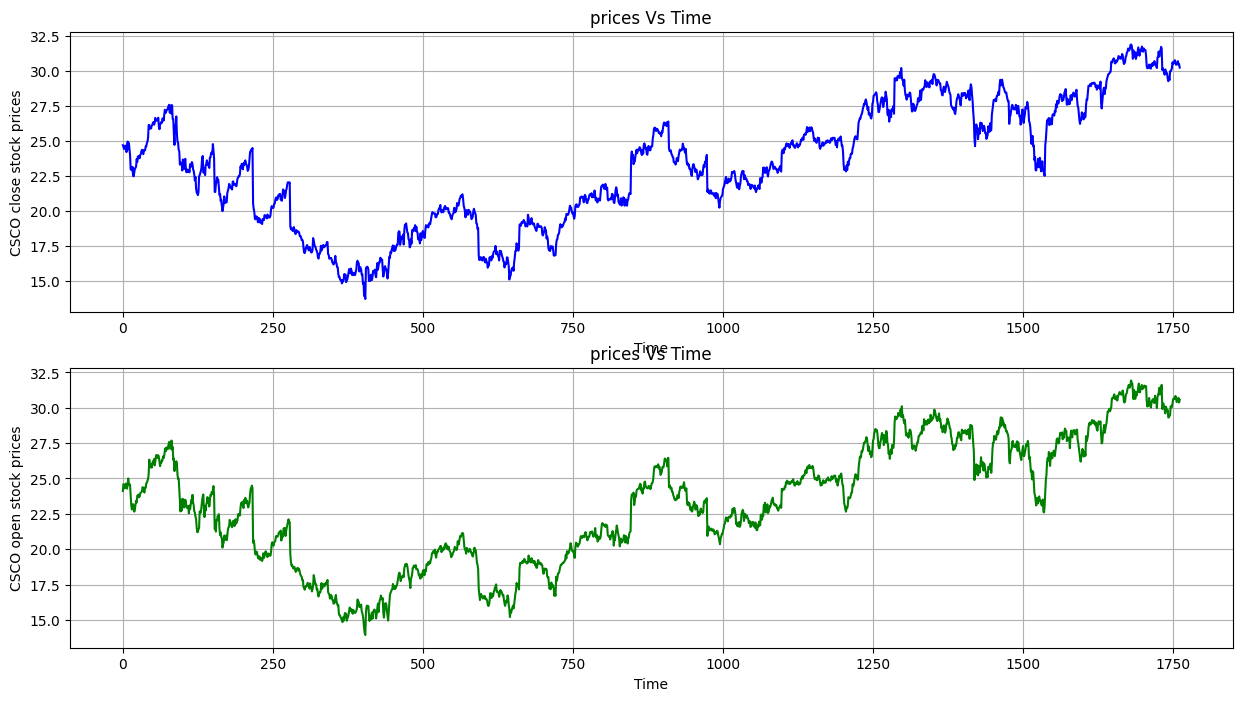

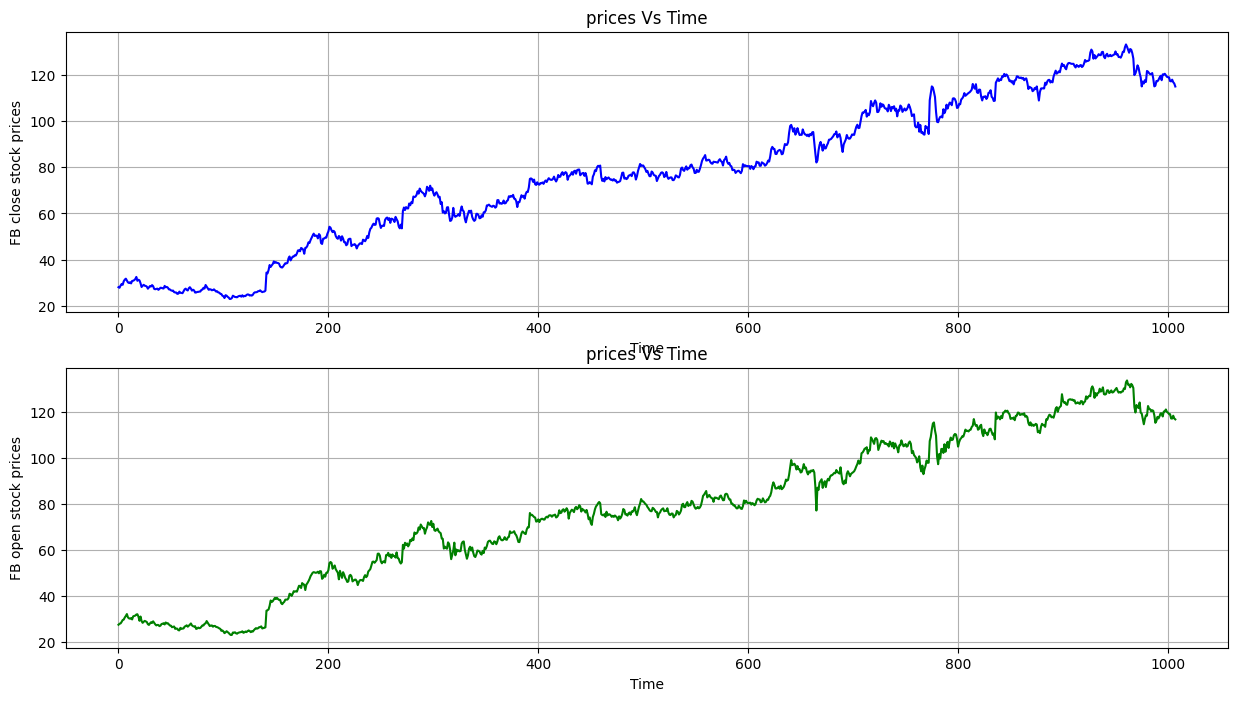

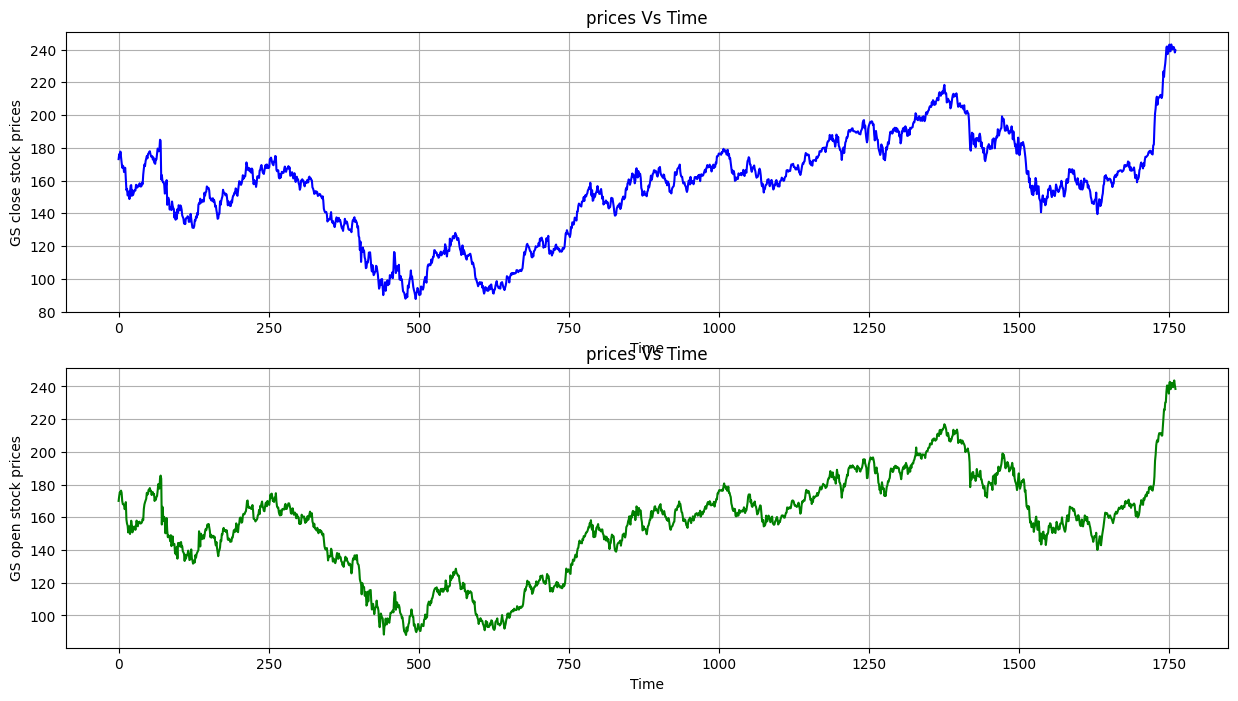

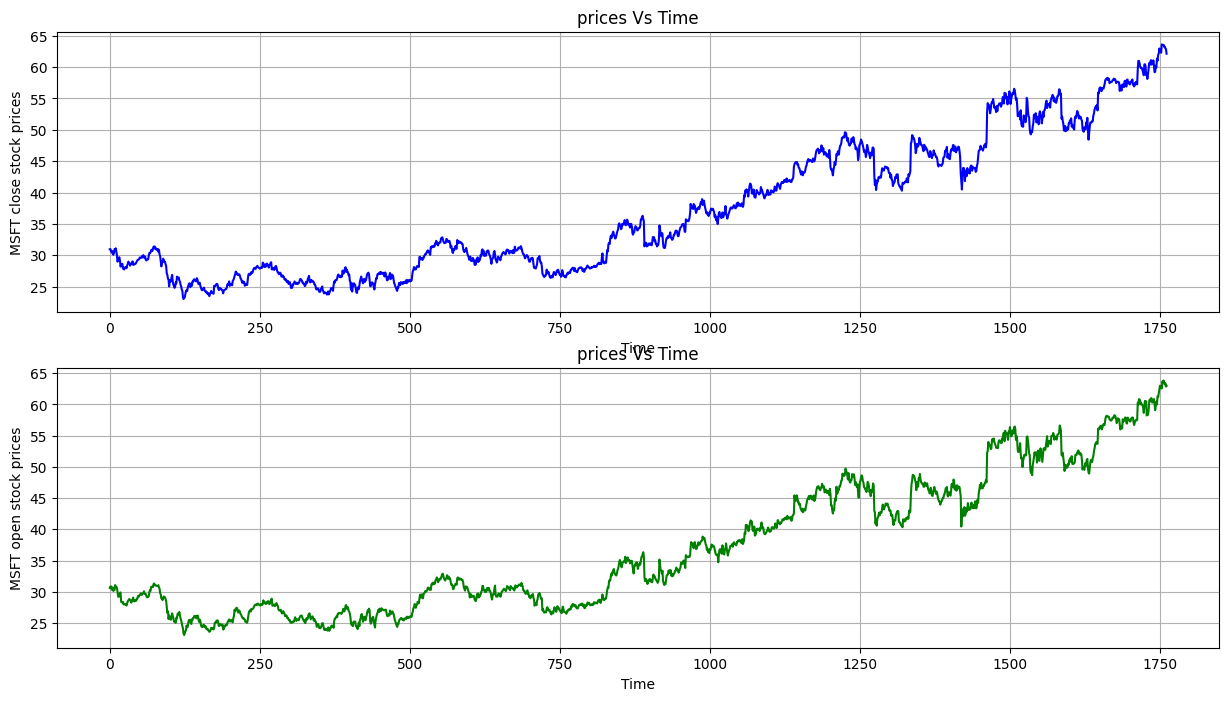

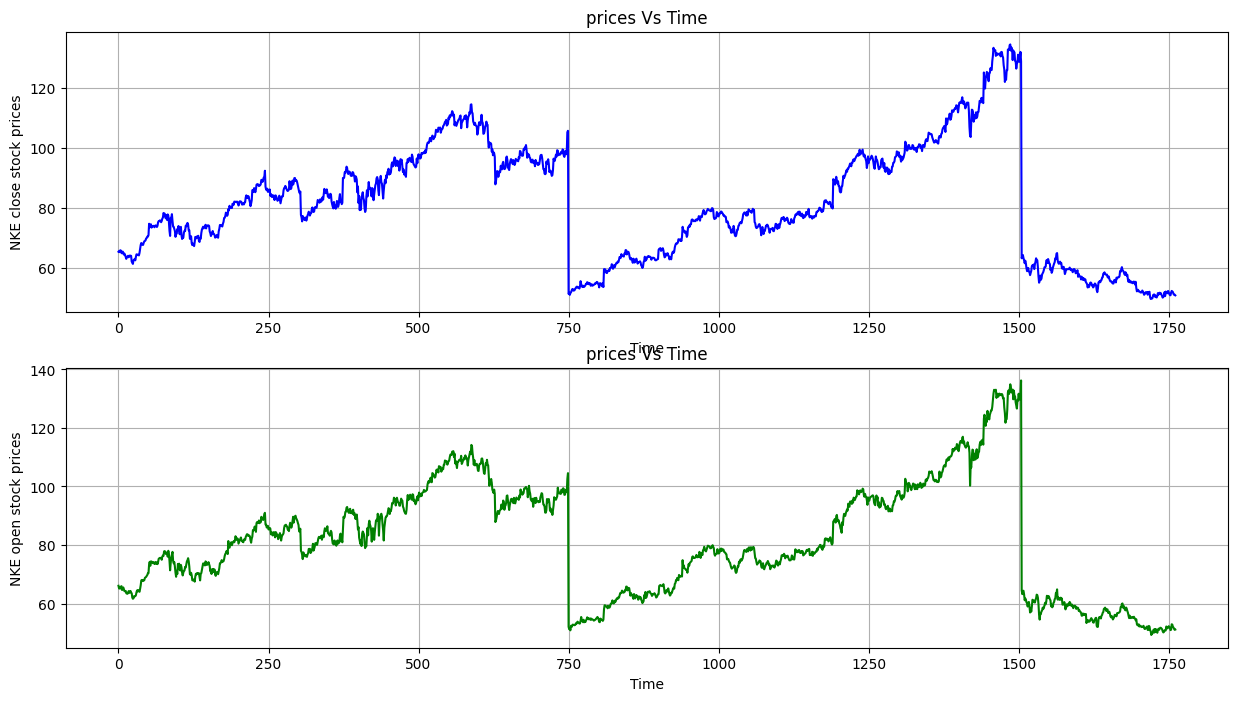

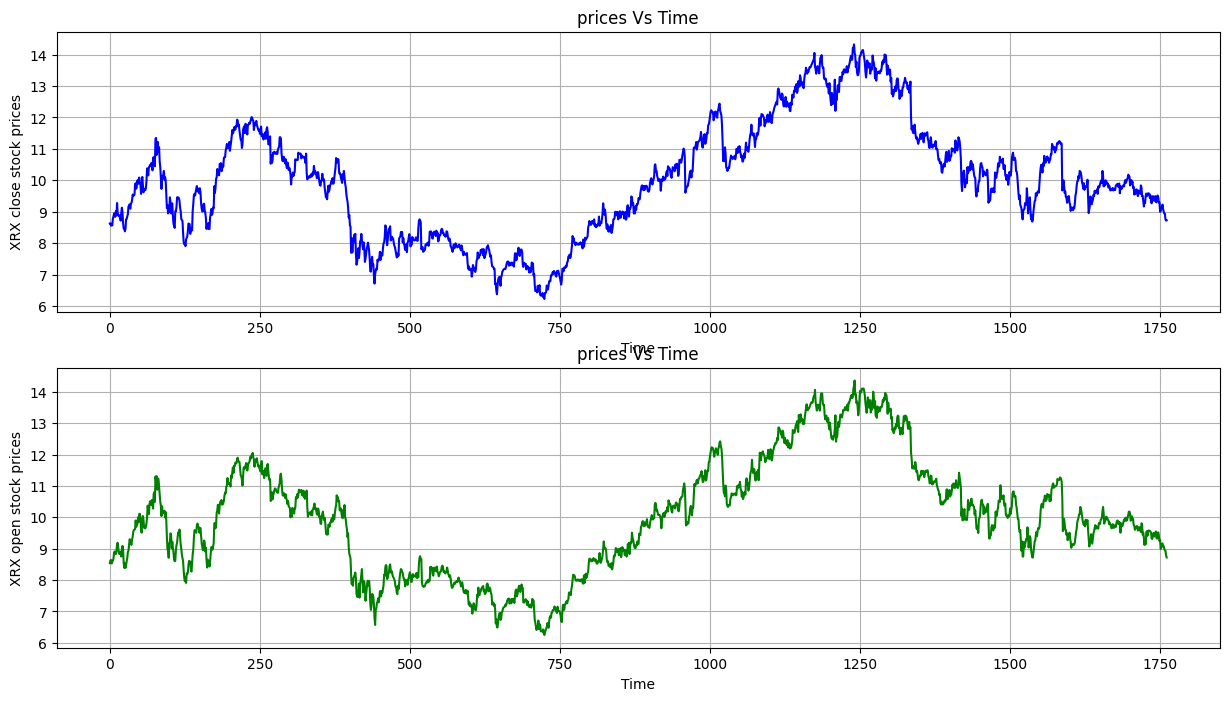

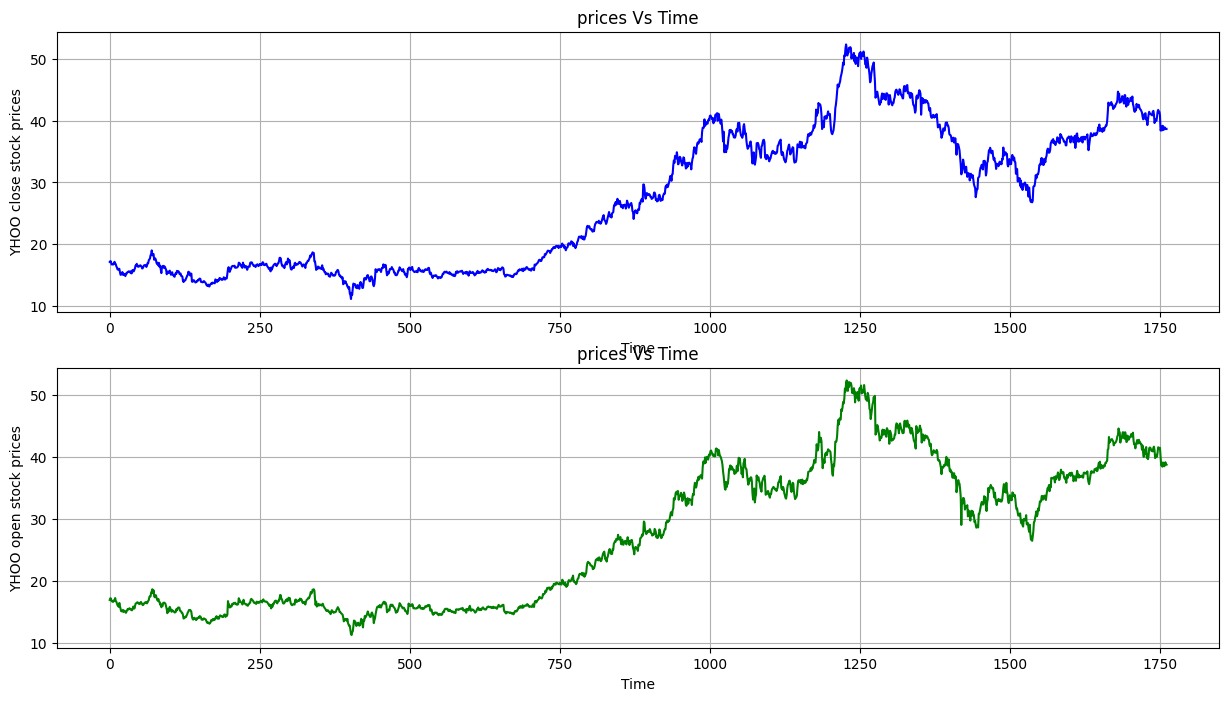

In [57]:
for i in comp_plot:
    plotter(i)

In [58]:
stocks1= np.array (df[df.symbol.isin (['YHOO'])].close)
print(stocks1)

[17.1      17.23     17.17     ... 38.73     38.639999 38.669998]


In [59]:
stocks2= np.array (df[df.symbol.isin (['NKE'])].close)
print(stocks2)

[65.349998 65.610001 65.209999 ... 51.02     51.060001 50.830002]


In [60]:
stocks3= np.array (df[df.symbol.isin (['FB'])].close)
print(stocks3)

[ 28.        27.77      28.76     ... 116.919998 116.349998 115.050003]


In [61]:
display (stocks1.shape)

(1762,)

In [62]:
display (stocks2.shape)

(1762,)

In [63]:
display (stocks3.shape)

(1008,)

In [64]:
stocks1 = stocks1.reshape(len(stocks1) , 1)
print (stocks1.shape)
print(stocks1)

(1762, 1)
[[17.1     ]
 [17.23    ]
 [17.17    ]
 ...
 [38.73    ]
 [38.639999]
 [38.669998]]


In [65]:
from sklearn.preprocessing import MinMaxScaler
#scaling features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1)) 
stocks1 = scaler.fit_transform(stocks1) 
display(stocks1)

array([[0.14559109],
       [0.14874031],
       [0.14728683],
       ...,
       [0.66957366],
       [0.6673934 ],
       [0.66812012]])

In [66]:
train = int(len(stocks1) * 0.8)

In [67]:
test = len(stocks1) - train 

In [68]:
train = stocks1[0:train]
display (train.shape)
print(train)

(1409, 1)

[[0.14559109]
 [0.14874031]
 [0.14728683]
 ...
 [0.63372095]
 [0.61458332]
 [0.61967051]]


In [69]:
test = stocks1[len(train) : ]
display(test.shape)
display (test)

(353, 1)

array([[0.63129851],
       [0.60416666],
       [0.56686053],
       [0.6017442 ],
       [0.60925394],
       [0.60586237],
       [0.59593022],
       [0.58381782],
       [0.55741276],
       [0.52906978],
       [0.48982557],
       [0.50024226],
       [0.51913761],
       [0.54748061],
       [0.53415697],
       [0.51235471],
       [0.49685079],
       [0.500969  ],
       [0.51962213],
       [0.49636629],
       [0.47989342],
       [0.4949128 ],
       [0.48594962],
       [0.49273257],
       [0.46584303],
       [0.48328492],
       [0.49200583],
       [0.48062017],
       [0.47601745],
       [0.48643412],
       [0.46778102],
       [0.45179265],
       [0.44210272],
       [0.43701549],
       [0.39995156],
       [0.41593993],
       [0.43168606],
       [0.43168606],
       [0.47529068],
       [0.47868218],
       [0.48134689],
       [0.50339151],
       [0.51550386],
       [0.51913761],
       [0.52737407],
       [0.51477714],
       [0.50872094],
       [0.542

In [70]:
#creating function to create trainX,testX and target(trainY, testY)
def process_data(data , n_features):
    dataX, dataY = [], [] # creating data for dataset and dividing inta X,Y
    for i in range(len(data)-n_features):
        # taking i range from total size- 3 
        a = data[i:(i+n_features), 0]
        # Here a is value of data from i to i+ n_features, ie two values and put it in dataX 
        dataX.append(a) #putting a in dataX
        #here dataY takes the value of data of i + n_features
        dataY.append(data[i + n_features, 0])
        # putting i+ n_features in  dataY
    return np.array(dataX), np.array(dataY)
# returning dataX and dataY in array

In [71]:
n_features = 2
# Here we create train X, Train Y and test X, Test Y data where trainX, testX has two value is each block

trainX, trainY = process_data(train, n_features)
print(trainX.shape , trainY.shape)

(1407, 2) (1407,)


In [72]:
testX, testY = process_data(test, n_features)
print (testX.shape , testY.shape)

(351, 2) (351,)


In [73]:
stocksX, stocksY = process_data(stocks1, n_features)
print (stocksX.shape , stocksY.shape)

(1760, 2) (1760,)


In [74]:
display (trainX[:10])

array([[0.14559109, 0.14874031],
       [0.14874031, 0.14728683],
       [0.14728683, 0.13590119],
       [0.13590119, 0.13590119],
       [0.13590119, 0.13687016],
       [0.13687016, 0.13541667],
       [0.13541667, 0.14074613],
       [0.14074613, 0.14607561],
       [0.14607561, 0.13880814],
       [0.13880814, 0.13711241]])

In [75]:
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

In [76]:
stocksX= stocksX.reshape(stocksX.shape[0] , 1 ,stocksX.shape[1])
display (stocksX.shape)

(1760, 1, 2)

In [77]:
import math 
# for setting layers one by one neural layer in model 
from keras.models import sequential 
# types of layers
from keras.layers import Dense , BatchNormalization , Dropout , Activation 
# types of RNN
from keras.layers import LSTM , GRU 
#It puts the data in between given range to set data before putting layer
from sklearn.preprocessing import MinMaxScaler 
# In this method the errors in column is squared and then mean is found 
from sklearn.metrics import mean_squared_error 
# Optimizers used
from tensorflow.keras.optimizers import Adam , SGD , RMSprop

In [78]:
#Checkpointing the model when required and using other call-backs.
filepath="stock_weights2.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
# ReduceLROnPlateau- This reduce the learning rate when the matrix stop improving or  too close to reduce overfitting
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_delta=0.0001, patience=1, verbose=1)
#This check point will stop processing, if the model is not improving.
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')


In [79]:
# creating model for training data using sequential to give series wise output between layers
model = Sequential()
#Long Short Term Memory is a type of RNN specially used for time series problems
model.add(GRU(256, input_shape = (1 , n_features) , return_sequences=True))
#dropout is used to remove overfitting data on each layer of neural network
model.add(Dropout(0.2))

model.add(GRU(256 , return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(256 , return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(256))
model.add(Dropout(0.2))

model.add(Dense(1))
#for getting the details of our models
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 256)            199680    
                                                                 
 dropout (Dropout)           (None, 1, 256)            0         
                                                                 
 gru_1 (GRU)                 (None, 1, 256)            394752    
                                                                 
 dropout_1 (Dropout)         (None, 1, 256)            0         
                                                                 
 lstm (LSTM)                 (None, 1, 256)            525312    
                                                                 
 dropout_2 (Dropout)         (None, 1, 256)            0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               5

In [80]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

In [81]:
model.fit(trainX, trainY, epochs=100 , batch_size = 64 , callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY)) 

Epoch 1/100
22/22 [==============================] - ETA: 0s - loss: 0.1160 - mean_squared_error: 0.1160
Epoch 1: val_loss improved from inf to 0.00922, saving model to stock_weights2.hdf5
22/22 [==============================] - 10s 160ms/step - loss: 0.1160 - mean_squared_error: 0.1160 - val_loss: 0.0092 - val_mean_squared_error: 0.0092 - lr: 5.0000e-04
Epoch 2/100
22/22 [==============================] - ETA: 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 2: val_loss improved from 0.00922 to 0.00188, saving model to stock_weights2.hdf5
22/22 [==============================] - 2s 84ms/step - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0019 - val_mean_squared_error: 0.0019 - lr: 5.0000e-04
Epoch 3/100
20/22 [==========================>...] - ETA: 0s - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 3: val_loss improved from 0.00188 to 0.00070, saving model to stock_weights2.hdf5
22/22 [==============================] - 2s 87ms/step - loss: 0.0040 - mean_squared_error

22/22 [==============================] - 0s 20ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 5.0629e-04 - val_mean_squared_error: 5.0629e-04 - lr: 5.0000e-20
Epoch 22/100
20/22 [==========================>...] - ETA: 0s - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 22: val_loss did not improve from 0.00043

Epoch 22: ReduceLROnPlateau reducing learning rate to 5.000000245224397e-22.
22/22 [==============================] - 0s 20ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 5.0629e-04 - val_mean_squared_error: 5.0629e-04 - lr: 5.0000e-21
Epoch 23/100
20/22 [==========================>...] - ETA: 0s - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 23: val_loss did not improve from 0.00043

Epoch 23: ReduceLROnPlateau reducing learning rate to 5.0000003461985925e-23.
22/22 [==============================] - 0s 19ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 5.0629e-04 - val_mean_squared_error: 5.0629e-04 - lr: 5.0000e-22
Epoch 24/1

Epoch 42/100
20/22 [==========================>...] - ETA: 0s - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 42: val_loss did not improve from 0.00043

Epoch 42: ReduceLROnPlateau reducing learning rate to 4.99997305055738e-42.
22/22 [==============================] - 0s 19ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 5.0629e-04 - val_mean_squared_error: 5.0629e-04 - lr: 5.0000e-41
Epoch 43/100
22/22 [==============================] - ETA: 0s - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 43: val_loss did not improve from 0.00043

Epoch 43: ReduceLROnPlateau reducing learning rate to 4.9998329207109475e-43.
22/22 [==============================] - 0s 22ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 5.0629e-04 - val_mean_squared_error: 5.0629e-04 - lr: 4.9998e-42
Epoch 44/100
20/22 [==========================>...] - ETA: 0s - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 44: val_loss did not improve from 0.00043

Epoch 44: ReduceLROnPlateau red

Epoch 66/100
21/22 [===========================>..] - ETA: 0s - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 66: val_loss did not improve from 0.00043
22/22 [==============================] - 0s 18ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 5.0629e-04 - val_mean_squared_error: 5.0629e-04 - lr: 0.0000e+00
Epoch 67/100
21/22 [===========================>..] - ETA: 0s - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 67: val_loss did not improve from 0.00043
22/22 [==============================] - 0s 18ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 5.0629e-04 - val_mean_squared_error: 5.0629e-04 - lr: 0.0000e+00
Epoch 68/100
21/22 [===========================>..] - ETA: 0s - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 68: val_loss did not improve from 0.00043
22/22 [==============================] - 0s 18ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 5.0629e-04 - val_mean_squared_error: 5.0629e-04 - lr: 0.0000e+00
Epoch 69/100


Epoch 91/100
19/22 [========================>.....] - ETA: 0s - loss: 0.0011 - mean_squared_error: 0.0011  
Epoch 91: val_loss did not improve from 0.00043
22/22 [==============================] - 0s 19ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 5.0629e-04 - val_mean_squared_error: 5.0629e-04 - lr: 0.0000e+00
Epoch 92/100
19/22 [========================>.....] - ETA: 0s - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 92: val_loss did not improve from 0.00043
22/22 [==============================] - 0s 21ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 5.0629e-04 - val_mean_squared_error: 5.0629e-04 - lr: 0.0000e+00
Epoch 93/100
19/22 [========================>.....] - ETA: 0s - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 93: val_loss did not improve from 0.00043
22/22 [==============================] - 0s 19ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 5.0629e-04 - val_mean_squared_error: 5.0629e-04 - lr: 0.0000e+00
Epoch 94/10

In [82]:
test_pred = model.predict(testX)
display (test_pred [:10])

array([[0.6036093 ],
       [0.5699841 ],
       [0.5700261 ],
       [0.59149945],
       [0.59344375],
       [0.58640563],
       [0.5749449 ],
       [0.55481863],
       [0.5267333 ],
       [0.49223012]], dtype=float32)

In [83]:
test_pred = scaler.inverse_transform(test_pred)
display (test_pred [:10])

array([[36.006992],
       [34.618942],
       [34.620678],
       [35.507095],
       [35.587357],
       [35.296825],
       [34.823727],
       [33.992912],
       [32.83355 ],
       [31.409258]], dtype=float32)

In [84]:
testY = testY.reshape(testY.shape[0] , 1)
#Converting reshaped list in 1D array so that it will be efficient in plotting
testY = scaler.inverse_transform(testY)
# taking testY from 1 to 10
display (testY[:10])

array([[34.490002],
       [35.93    ],
       [36.240002],
       [36.099998],
       [35.689999],
       [35.189999],
       [34.099998],
       [32.93    ],
       [31.309999],
       [31.74    ]])

In [85]:
from sklearn.metrics import r2_score
r2_score(testY,test_pred)

0.955347520405327

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


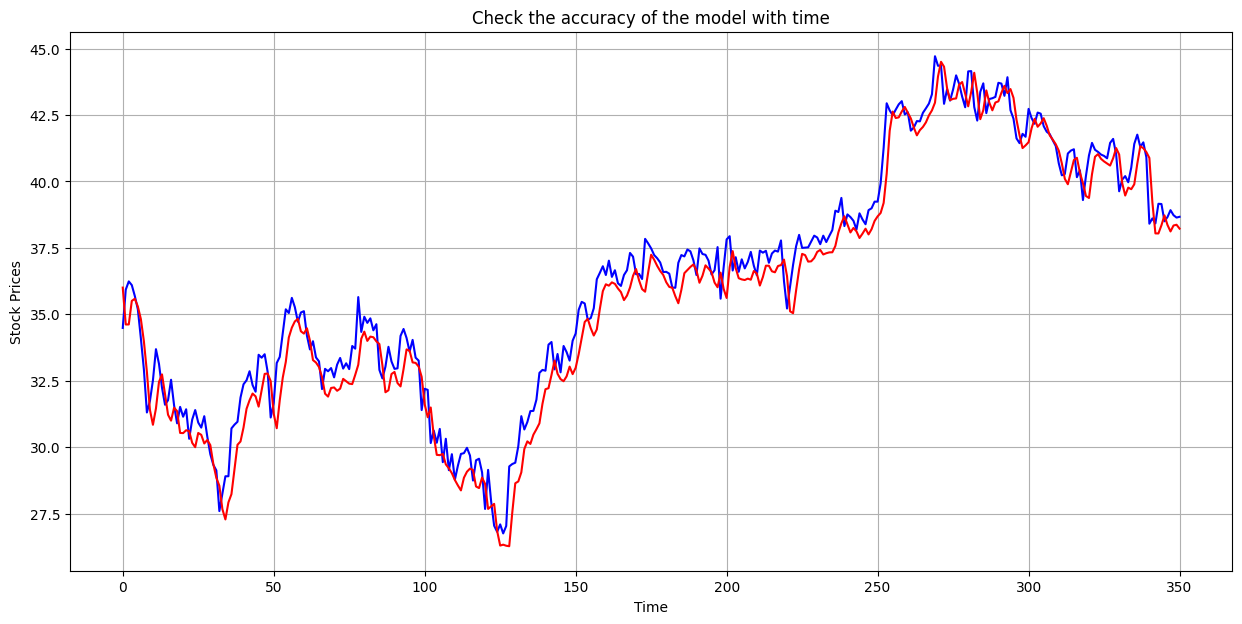

In [86]:
# Ploting the graph of stock prices with time
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
# testY is the blue line
plt.plot(testY , 'b')
# pred is the red line
plt.plot(test_pred , 'r')
# Setting x axis as time
plt.xlabel('Time')
# Setting y axis as stock prices
plt.ylabel('Stock Prices')
# setting title 
plt.title('Check the accuracy of the model with time')
# enabling grids in graph 
plt.grid(True)
# it call the graph with labels, titles, lines
plt.show()

In [87]:
train_pred = model.predict(trainX)
train_pred = scaler.inverse_transform(train_pred)
trainY = trainY.reshape(trainY.shape[0] , 1)
trainY = scaler.inverse_transform(trainY)
print ('Display Accuracy Training Data')
display (r2_score(trainY,train_pred))

Display Accuracy Training Data


0.9960408547988479

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


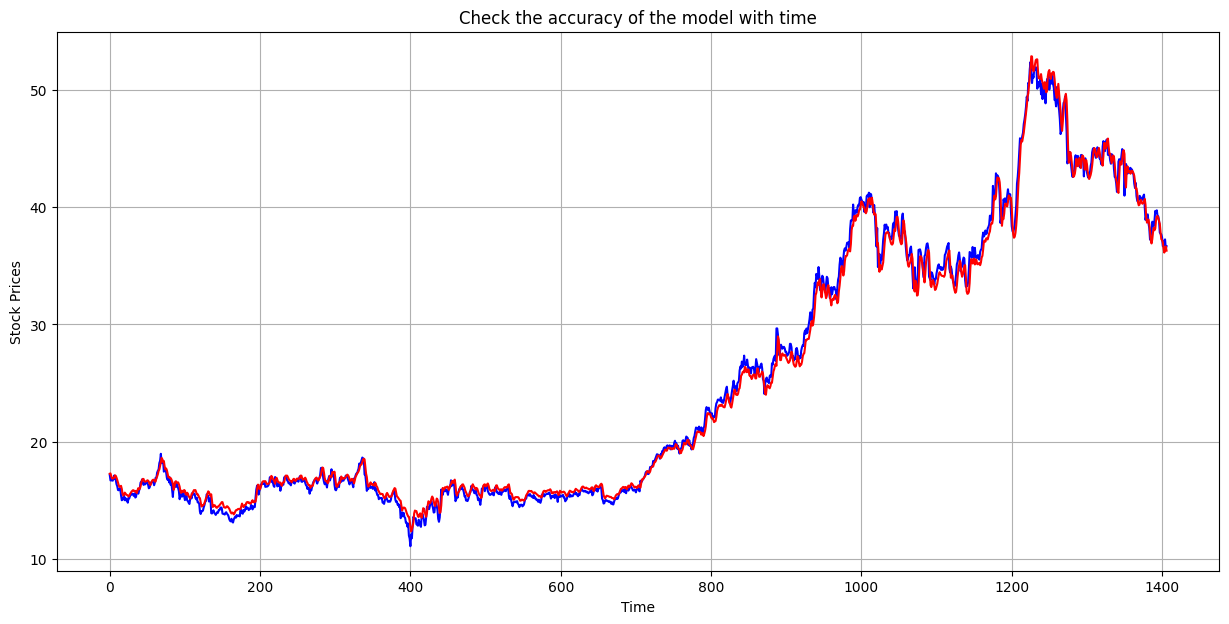

In [88]:
# Ploting the graph of stock prices with time - Training Data
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(trainY  , 'b')
plt.plot(train_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()

In [89]:
stocks_pred = model.predict(stocksX)
stocks_pred = scaler.inverse_transform(stocks_pred)
display_stock_pred = stocks_pred
stocksY = stocksY.reshape(stocksY.shape[0] , 1)
stocksY = scaler.inverse_transform(stocksY)
print ('Display Accuracy Training Data')
display (r2_score(stocksY,stocks_pred))

Display Accuracy Training Data


0.9954437767370499

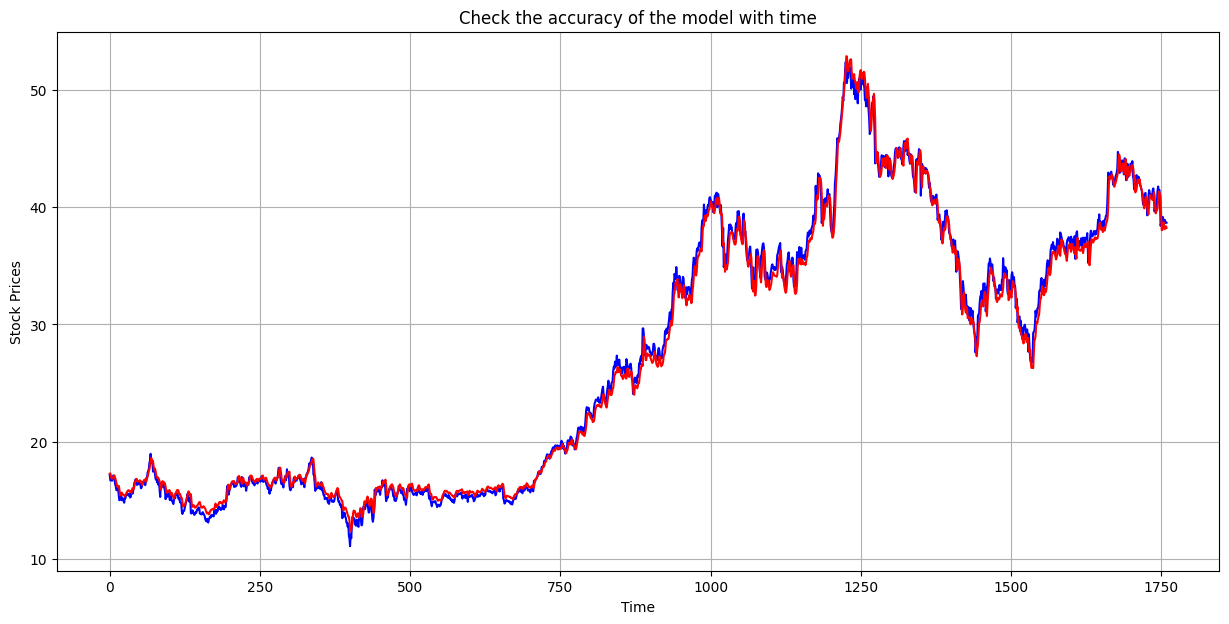

In [90]:
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(stocksY  , 'b')
plt.plot(stocks_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()


In [91]:
# Extract the data related to company - CSCO
results= df[df.symbol.isin (['CSCO'])]
# Update the data frame starting with 2nd records , since first prediction is for 2nd record
results= results [2:]
# Reset the index 0, 1,2 etc
results = results.reset_index(drop=True)
# Convert Predicted Value to Data Frame
df_stocks_pred= pd.DataFrame(stocks_pred, columns = ['Close_Prediction'])
# Concat Original and prediction data
results= pd.concat([results,df_stocks_pred],axis =1)
final_results = results
results.to_excel('results.xlsx')
display(results)

,date,symbol,open,close,low,high,volume,Close_Prediction
0,2010-01-06,CSCO,24.540001,24.420000,24.340000,24.740000,35715700.0,17.271399
1,2010-01-07,CSCO,24.299999,24.530001,24.170000,24.570000,31531200.0,17.299181
2,2010-01-08,CSCO,24.379999,24.660000,24.250000,24.700001,39115900.0,17.059584
3,2010-01-11,CSCO,24.639999,24.590000,24.410000,24.889999,35852900.0,16.860968
4,2010-01-12,CSCO,24.440001,24.200001,24.080000,24.500000,35780400.0,16.879126
...,...,...,...,...,...,...,...,...
1755,2016-12-23,CSCO,30.540001,30.530001,30.400000,30.600000,9167500.0,38.362644
1756,2016-12-27,CSCO,30.639999,30.680000,30.600000,30.820000,14175500.0,38.118465
1757,2016-12-28,CSCO,30.700001,30.420000,30.350000,30.770000,12022200.0,38.342194
1758,2016-12-29,CSCO,30.370001,30.459999,30.330000,30.549999,10995600.0,38.371021


In [109]:
import seaborn as sns

In [118]:
close_data = results.astype({'close':'float'})
close_pred_data = results.astype({'Close_Prediction':'float'})
close_data

,date,symbol,open,close,low,high,volume,Close_Prediction
0,2010-01-06,CSCO,24.540001,24.420000,24.340000,24.740000,35715700.0,17.271399
1,2010-01-07,CSCO,24.299999,24.530001,24.170000,24.570000,31531200.0,17.299181
2,2010-01-08,CSCO,24.379999,24.660000,24.250000,24.700001,39115900.0,17.059584
3,2010-01-11,CSCO,24.639999,24.590000,24.410000,24.889999,35852900.0,16.860968
4,2010-01-12,CSCO,24.440001,24.200001,24.080000,24.500000,35780400.0,16.879126
...,...,...,...,...,...,...,...,...
1755,2016-12-23,CSCO,30.540001,30.530001,30.400000,30.600000,9167500.0,38.362644
1756,2016-12-27,CSCO,30.639999,30.680000,30.600000,30.820000,14175500.0,38.118465
1757,2016-12-28,CSCO,30.700001,30.420000,30.350000,30.770000,12022200.0,38.342194
1758,2016-12-29,CSCO,30.370001,30.459999,30.330000,30.549999,10995600.0,38.371021


In [121]:
results['close']

0       24.420000
1       24.530001
2       24.660000
3       24.590000
4       24.200001
          ...    
1755    30.530001
1756    30.680000
1757    30.420000
1758    30.459999
1759    30.219999
Name: close, Length: 1760, dtype: float64

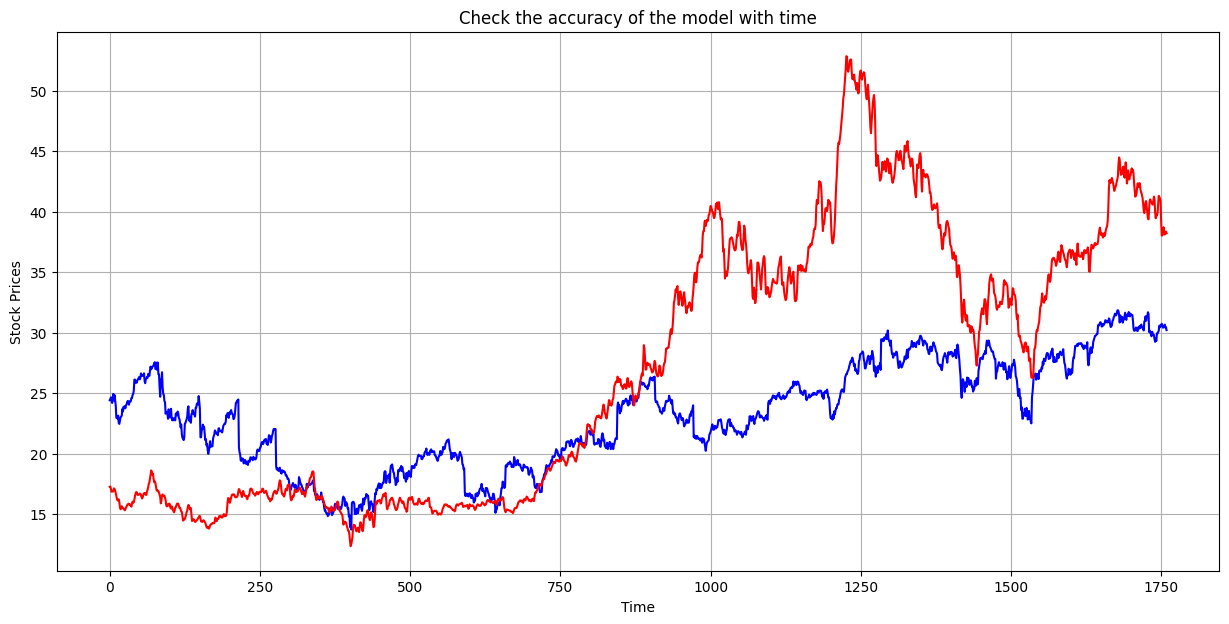

In [123]:
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(results['close'] , 'b')
plt.plot(results['Close_Prediction'], 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()